## **Graph Neural Networks for Capturing Dependencies in Graph Structured Data (Part 1/2)**

---

### **Graph Neural Networks for Capturing Dependencies in Graph-Structured Data**


**1. Graph-Structured Data**

Many real-world systems are naturally represented as **graphs**:

* **Nodes (vertices)** represent entities.
* **Edges** represent relationships or interactions.

Examples:

* Molecules → atoms as nodes, chemical bonds as edges.
* Social networks → people as nodes, friendships as edges.
* Citation networks → papers as nodes, citations as edges.

A graph is represented as:

$$G = (V, E)$$

where:

* $`V`$ = set of nodes,
* $`E`$ = set of edges.

Each node may have features:

$$X \in \mathbb{R}^{|V| \times d}$$

And an adjacency matrix:

$$A \in \mathbb{R}^{|V| \times |V|}$$



**2. Why Standard Neural Networks Do Not Work**

Traditional neural networks assume:

* Fixed input shape (e.g., image grid),
* Spatial locality (neighboring pixels).

Graphs are **irregular**:

* Nodes have different numbers of neighbors.
* No fixed spatial ordering.
* Structure itself carries meaning.

Thus, we require models that:

1. Respect **permutation invariance**.
2. Aggregate **neighbor information**.
3. Preserve **graph topology**.



**3. Core Idea of Graph Neural Networks**

Graph Neural Networks operate by **message passing**:

Each node updates its representation by aggregating features from its neighbors.

For node $`i`$ at layer $`k`$, representation is:

$$h_i^{(k+1)} = \mathrm{UPDATE}\left( h_i^{(k)}, \mathrm{AGG}\left( \{ h_j^{(k)} : j \in \mathcal{N}(i) \} \right) \right)$$

Where:

* $`\mathcal{N}(i)`$ is the neighbor set of node $`i`$,
* $`\mathrm{AGG}`$ is a permutation-invariant function (mean, sum, max),
* $`\mathrm{UPDATE}`$ is typically a learned transformation.



**4. Graph Convolutional Networks (GCN)**

The most widely used GNN model:

$$H^{(k+1)} = \sigma\left( \tilde{D}^{-\frac{1}{2}} \tilde{A} \tilde{D}^{-\frac{1}{2}} H^{(k)} W^{(k)} \right)$$

Where:

* $`H^{(k)}`$ is node representations at layer $`k`$,
* $`\tilde{A} = A + I`$ adds self-connections,
* $`\tilde{D}`$ is the degree matrix of $`\tilde{A}`$,
* $`W^{(k)}`$ are learnable parameters,
* $`\sigma`$ is a non-linearity.

This performs **Laplacian smoothing**:
Nodes with edges become more similar across layers.



**5. Graph Attention Networks (GAT)**

Instead of averaging neighbors equally, learn **attention weights**:

$$e_{ij} = \mathrm{a}(W h_i, W h_j)$$

Normalized via softmax:

$$\alpha_{ij} = \frac{\exp(e_{ij})}{\sum_{k \in \mathcal{N}(i)} \exp(e_{ik})}$$

Updated representation:

$$h_i^{(k+1)} = \sigma\left( \sum_{j \in \mathcal{N}(i)} \alpha_{ij} W h_j \right)$$

This allows the model to learn **which neighbors are important**.



**6. Message Passing Neural Network View**

Generalized framework:

1. **Message computation**:

$$m_{ij}^{(k)} = \phi_m(h_i^{(k)}, h_j^{(k)}, e_{ij})$$

2. **Message aggregation**:

$$m_i^{(k)} = \sum_{j \in \mathcal{N}(i)} m_{ij}^{(k)}$$

3. **Node update**:

$$h_i^{(k+1)} = \phi_h(h_i^{(k)}, m_i^{(k)})$$

This is flexible and applies to molecules, social networks, scenes, and knowledge graphs.



**7. Capturing Graph-Level, Node-Level, and Edge-Level Patterns**

| Task Type            | Output                 | Description                            |
| -------------------- | ---------------------- | -------------------------------------- |
| Node Classification  | Label per node         | Example: Detect toxic atom in molecule |
| Graph Classification | Single label per graph | Example: Predict molecule solubility   |
| Link Prediction      | Predict missing edges  | Example: Recommend friends             |

Pooling methods (sum/mean attention pooling) allow generating **graph-level embeddings**.



**8. Why GNNs Capture Dependencies Well**

* Local neighborhood aggregation captures **local structure**.
* Stacking layers propagates **global structure**.
* Graph attention focuses on **important interactions**.

This makes GNNs powerful for:

* Relationship modeling,
* Structured environments,
* Systems with complex interactions.

---

In [1]:
from IPython.display import Image
%matplotlib inline

### **Introduction to graph data**

- Graphs are a kind of data structure that is nonlinear and abstract.
- Graphs can be defined to have certain properties that may require different representations.

![Types of Graphs](./figures/18_01.png)



### **Undirected graphs**

- consists of `nodes` (vertices) that are connected via `edges` where the order of the nodes and their connection does not matter.

![Undirected graphs](./figures/18_02.png)

- Other common examples of data that can be represented as `undirected graphs` include 
  - `images`, 
  - `protien-protein interaction networks`, and
  - `point clouds`.

- Mathematically, an undirected graph `G` is a pair of `(V, E)`, where `V` is a set of the graph's nodes, and `E` is the set of edges making up the paired nodes.

- The graph can be encoded as $|V| \times |V|$ `adjacency matrix A`.

- Each element $x_{ij}$ in matrix $A$ is either a `1` or a `0`, with `1` denoting an edge between `nodes` $i$ and $j$ (vice versa, `0` denotes the absence of an edge).

- An additional property of an undirected graph `A` is that $x_{ij} = x_{ji}$

* `Adjacency Matrix` is a square matrix used to represent a finite graph. The elements of the matrix indicate whether pairs of vertices are adjacent or not in the graph. An adjacency matrix is a simple and straightforward way to represent graphs and is particularly useful for dense graphs.

### **Directed graphs**

- `Directed graphs` connects nodes via `directed edges`. 
- Mathematically, they are defined in the same way as an undirected graph, except that $E$, the set of edges, is a set of `ordered pairs`.
- Element `A` is that $x_{ij} \neq x_{ji}$


![Directed Graph](./figures/18_03.png)



### **Labeled graphs**

- Many graphs we are interested in working with have additional information associated with each of their nodes and edges.

- Given graph $G$, defined by the node set and edge set tuple $(V, E)$, we define a $|V| \times f_{V}$ node feature matrix X, where $f_{V}$ is the length of the label vector of each node. 
- For edge labels, we define an $|E| \times f_{E}$ edge feature matrix $X_{E}$, where $f_{E}$ is the length of the label vector of each edge.



### **Representing molecules as graphs**

- As a chemical overview, molecules can be thought of as groups of atoms held together by chemical bonds. There are different atoms corresponding to different chemical elements, for example, common elements include `carbon (C)`, `oxygen (O)`, `nitrogen (N)`, and `hydrogen (H)`. Also, there are different kinds
of bonds that form the connection between atoms, for example, `single or double bonds`.


![Graph representation of a caffeine molecule](./figures/18_04.png)




## **Understanding graph convolutions**

### **The motivation behind using graph convolutions**

![Different adjacency matrices representing the same graph](./figures/18_05.png)

- A convolutional approach is also desirable for graphs because it can function with a fixed parameter set for graphs of different sizes. This property is arguably even more important for graphs than images.

### **Implementing a basic graph convolution**

![A representation of a graph](./figures/18_06.png)

- The figure above depicts an undirected graph with node labels specified by an $n×n$ adjacency matrix $A$ and $n \times f_{in}$ node feature matrix $X$, where the only feature is a one-hot representation of each node’s color green `(G)`, blue `(B)`, or orange `(O)`.

In [2]:
import numpy as np
import networkx as nx 

G = nx.Graph()

#Hex codes for colors if we draw graph
blue, orange, green = "#1f77b4", "#ff7f0e","#2ca02c"

G.add_nodes_from([(1, {"color": blue}),
                  (2, {"color": orange}),
                  (3, {"color": blue}),
                  (4, {"color": green})])

G.add_edges_from([(1, 2),(2, 3),(1, 3),(3, 4)])
A = np.asarray(nx.adjacency_matrix(G).todense())
print(A)

[[0 1 1 0]
 [1 0 1 0]
 [1 1 0 1]
 [0 0 1 0]]


In [3]:
def build_graph_color_label_representation(G,mapping_dict):
    one_hot_idxs = np.array([mapping_dict[v] for v in 
                             nx.get_node_attributes(G, 'color').values()])
    one_hot_encoding = np.zeros((one_hot_idxs.size,len(mapping_dict)))
    one_hot_encoding[np.arange(one_hot_idxs.size),one_hot_idxs] = 1
    return one_hot_encoding

X = build_graph_color_label_representation(G, {green: 0, blue: 1, orange: 2})
print(X)

[[0. 1. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]]


- To draw the graph constructed in the preceding code, we can then use the following code:

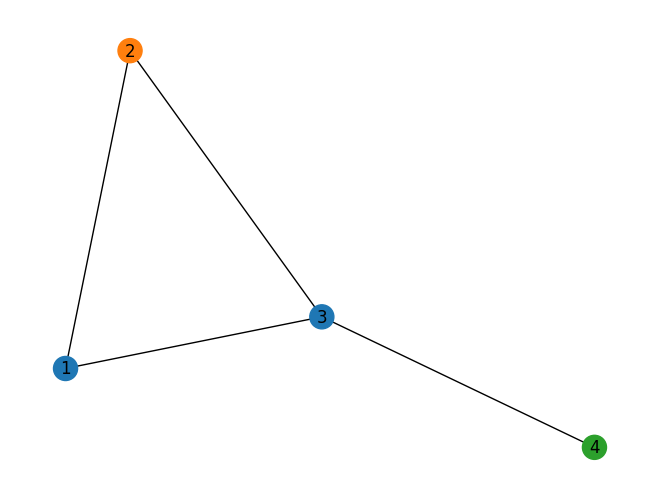

In [4]:
color_map = nx.get_node_attributes(G, 'color').values()
nx.draw(G, with_labels=True, node_color=color_map)

- In the preceding code example, we first initiated a new Graph object from `NetworkX`. We then added nodes `1` to `4` together with color specifications for visualization. After adding the nodes, we specified their connections (edges). Using the `adjacency_matrix` constructor from `NetworkX`, we create the
adjacency matrix A, and our custom `build_graph_color_label_representation` function creates the node label matrix X from the information we added to the Graph object earlier.

- With graph convolutions, we can interpret each row of $X$ as being an embedding of the information that is stored at the node corresponding to that row. Graph convolutions update the embeddings at each node based on the embeddings of their neighbors and themselves. For our example implementation, the graph convolution will take the following form:

$$x'_{i} = x_{i}W_1 = \sum_{j \in N(i)} x_{j}W_2 + b$$

where
- $x'$ is the updated embedding for node `i`;
- $W_1$ and $W_2$ are $f_{in} \times f_{out}$ matrices of learnable filter weights;
- and $b$ is a learnable bias vector of length $f_{out}$.


The two weight matrices $W_{1}$ and $W_{2}$ can be considered filter banks, where each column is an individual filter. Note that this filter design is most effective when the locality prior on graph data holds. If a value at a node is highly correlated with the value at another node many edges away, a single convolution will not capture that relationship. Stacking convolutions will capture more distant relationships, as illustrated below;


![Capturing relationships from a graph](./figures/18_07.png)



**How to implement the sum over neighbors in matrix form**

- This is where we utilize the adjacency matrix $A$.
- The matrix form of this convolution is $XW_{1} + AXW_{2}$.
- Here, the `adjacency matrix`, consisting of `1s` and `0s`, acts as a mask to select nodes and compute the desired sums. 

In [8]:
X.shape

(4, 3)

In [10]:
f_in, f_out = X.shape[1], 6
W_1 = np.random.rand(f_in, f_out) 
W_2 = np.random.rand(f_in, f_out) 
h = np.dot(X,W_1) + np.dot(np.dot(A, X), W_2)

In [11]:
h

array([[2.079792  , 1.43349822, 2.1784995 , 2.41965928, 0.79441012,
        1.69699761],
       [1.85701426, 1.21039713, 2.77455182, 2.11244676, 0.45011755,
        2.6277335 ],
       [2.8752309 , 1.89531396, 2.57578408, 2.64667589, 0.82898471,
        1.92076214],
       [1.58629088, 1.02768234, 1.63838979, 1.38677185, 0.26792717,
        1.57302162]])

- Computing a forward pass of a graph convolution is that easy.

- Ultimately, we want a graph convolutional layer to update the representation of the node information encoded in $X$ by utilizing the structural (connectivity) information provided by $A$. There are many potential ways to do this, and this plays out in the numerous kinds of graph convolutions that have
been developed.

![The convolutions implemented on the graph and the message form](./figures/18_08.png)



## **Implementing a GNN in PyTorch from scratch**


#### **Defining the NodeNetwork model**

- PyTorch from-scratch implementation of a GNN
- top-down approach, starting with the main neural network model

In [13]:
import networkx as nx
import torch
from torch.nn.parameter import Parameter
import numpy as np
import torch.nn.functional as F

In [14]:
class NodeNetwork(torch.nn.Module):

    def __init__(self, input_features):
        super().__init__()
        
        self.conv_1 = BasicGraphConvolutionLayer(input_features, 32)
        self.conv_2 = BasicGraphConvolutionLayer(32, 32)
        self.fc_1 = torch.nn.Linear(32, 16)
        self.out_layer = torch.nn.Linear(16, 2)
    
    def forward(self, X, A,batch_mat):
        x = self.conv_1(X, A).clamp(0)
        x = self.conv_2(x, A).clamp(0)
        output = global_sum_pool(x, batch_mat)
        output = self.fc_1(output)
        output = self.out_layer(output)
        return F.softmax(output, dim=1)

**The NodeNetwork model we just defined can be summarized as follows:**

- Perform two graph convolutions (`self.conv_1` and `self.conv_2`)
- Pool all the node embeddings via `global_sum_pool`, which we will define later
- Run the pooled embeddings through two fully connected layers (`self.fc_1` and `self.out_layer`)
- Output a class-membership probability via `softmax`.


![A visualization of each neural network layer](./figures/18_09.png)

#### **Coding the NodeNetwork’s graph convolution layer**

In [15]:
class BasicGraphConvolutionLayer(torch.nn.Module):

    def __init__(self, in_channels, out_channels):
        super().__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        
        self.W2 = Parameter(torch.rand(
             (in_channels, out_channels), dtype=torch.float32))
        self.W1 = Parameter(torch.rand(
             (in_channels, out_channels), dtype=torch.float32))
         
        self.bias = Parameter(torch.zeros(
                 out_channels, dtype=torch.float32))
    
    def forward(self, X, A):
        potential_msgs = torch.mm(X, self.W2)
        propagated_msgs = torch.mm(A, potential_msgs)
        root_update = torch.mm(X, self.W1)
        output = propagated_msgs + root_update + self.bias
        return output

- As with fully connected layers and image convolutional layers, we add a bias term so that the intercept of the linear combination of the layer outputs (prior to the application of a nonlinearity like ReLU) can vary. 

- The `forward()` method implements the matrix form of the forward pass, which we discussed in the previous subsection, with the addition of a `bias` term.

- To try out the `BasicGraphConvolutionLayer`, let’s apply it to the graph and adjacency matrix.

In [16]:
print('X.shape:', X.shape)

X.shape: (4, 3)


In [17]:
print('A.shape:', A.shape)

A.shape: (4, 4)


In [18]:
basiclayer = BasicGraphConvolutionLayer(3, 8)
out = basiclayer(X=torch.tensor(X, dtype=torch.float32),
                 A=torch.tensor(A, dtype=torch.float32)
)

print('Output shape:', out.shape)

Output shape: torch.Size([4, 8])


### **Adding a global pooling layer to deal with varying graph sizes**

- Next, we define the `global_sum_pool()` function that was used in the `NodeNetwork` class, where `global_sum_pool()` implements a global pooling layer. 
- Global pooling layers aggregate all of a graph’s node embeddings into a fixed-sized output. 
- `global_sum_pool()` sums all the node embeddings of a graph.
- Summing all the node embeddings results in a loss of information, so reshaping the data would be preferable, but since graphs can have different sizes, this is not feasible.
- Global pooling can be done with any permutation invariant function, for example, `sum`, `max`, and `mean`.

In [19]:
def global_sum_pool(X, batch_mat):
    if batch_mat is None or batch_mat.dim() == 1:
        return torch.sum(X, dim=0).unsqueeze(0)
    else:
        return torch.mm(batch_mat, X)

- If data is not batched or the batch size is one, this function just sums over the current node embeddings. Otherwise, the embeddings are multiplied with `batch_mat`, which has a structure based on how graph data is batched.

- When all data in a dataset has the same dimensionality, batching the data is as straightforward as adding a dimension by stacking the data.

- Since graph sizes vary, this approach is not feasible with graph data unless padding is used. However, padding can be inefficient in cases where graph sizes
can vary substantially.


![How to deal with varying graph sizes](./figures/18_10.png)




- This is the purpose of `batch_mat` in `global_sum_pool()` to serve as a graph selection mask that keeps the graphs in the batch separate.

- We can generate this mask for graphs of sizes $n_{1}, ..., n_{k}$ with the following code:

In [20]:
def get_batch_tensor(graph_sizes):
    starts = [sum(graph_sizes[:idx]) for idx in range(len(graph_sizes))]
    stops = [starts[idx]+graph_sizes[idx] for idx in range(len(graph_sizes))]
    tot_len = sum(graph_sizes)
    batch_size = len(graph_sizes)
    batch_mat = torch.zeros([batch_size, tot_len]).float()
    for idx, starts_and_stops in enumerate(zip(starts, stops)):
        start = starts_and_stops[0]
        stop = starts_and_stops[1]
        batch_mat[idx, start:stop] = 1
    return batch_mat

In [ ]:
# batch is a list of dictionaries each containing
# the representation and label of a graph
def collate_graphs(batch):
    adj_mats = [graph['A'] for graph in batch]
    sizes = [A.size(0) for A in adj_mats]
    tot_size = sum(sizes)
    # create batch matrix
    batch_mat = get_batch_tensor(sizes)
    # combine feature matrices
    feat_mats = torch.cat([graph['X'] for graph in batch],dim=0)
    # combine labels
    labels = torch.cat([graph['y'] for graph in batch], dim=0)
    # combine adjacency matrices
    batch_adj = torch.zeros([tot_size, tot_size], dtype=torch.float32)
    accum = 0
    for adj in adj_mats:
        g_size = adj.shape[0]
        batch_adj[accum:accum+g_size, accum:accum+g_size] = adj
        accum = accum + g_size
    repr_and_label = {
            'A': batch_adj, 
            'X': feat_mats,
            'y': labels,
            'batch' : batch_mat}

    return repr_and_label

### **Preparing the DataLoader**

- This function takes a `NetworkX` graph and returns a dictionary containing its adjacency matrix `A`, its node feature matrix `X`, and a binary label `y`.

- Since we won’t actually be training this model on a real-world task, we just set the labels arbitrarily. 

- Then, `nx.adjacency_matrix()` takes a NetworkX graph and returns a sparse representation that we convert to a dense `np.array` form using `todense()`.

- We’ll now construct graphs and use the `get_graph_dict` function to convert `NetworkX` graphs to a format our network can handle:

In [22]:
def get_graph_dict(G, mapping_dict):
    # build dictionary representation of graph G
    A = torch.from_numpy(np.asarray(nx.adjacency_matrix(G).todense())).float()
    # build_graph_color_label_representation() was introduced with the first example graph
    X = torch.from_numpy(build_graph_color_label_representation(G,mapping_dict)).float()
    # kludge since there is not specific task for this example
    y = torch.tensor([[1, 0]]).float()
    return {'A': A, 'X': X, 'y': y, 'batch': None}
    
# building 4 graphs to treat as a dataset

blue, orange, green = "#1f77b4", "#ff7f0e","#2ca02c"
mapping_dict = {green: 0, blue: 1, orange: 2}

G1 = nx.Graph()
G1.add_nodes_from([(1, {"color": blue}),
                   (2, {"color": orange}),
                   (3, {"color": blue}),
                   (4, {"color": green})])
G1.add_edges_from([(1, 2), (2, 3),(1, 3), (3, 4)])
G2 = nx.Graph()
G2.add_nodes_from([(1, {"color": green}),
                   (2, {"color": green}),
                   (3, {"color": orange}),
                   (4, {"color": orange}),
                   (5,{"color": blue})])
G2.add_edges_from([(2, 3),(3, 4),(3, 1),(5, 1)])
G3 = nx.Graph()
G3.add_nodes_from([(1, {"color": orange}),
                   (2, {"color": orange}),
                   (3, {"color": green}),
                   (4, {"color": green}),
                   (5, {"color": blue}),
                   (6, {"color":orange})])
G3.add_edges_from([(2, 3), (3, 4), (3, 1), (5, 1), (2, 5), (6, 1)])
G4 = nx.Graph()
G4.add_nodes_from([(1, {"color": blue}), (2, {"color": blue}), (3, {"color": green})])
G4.add_edges_from([(1, 2), (2, 3)])
graph_list = [get_graph_dict(graph,mapping_dict) for graph in [G1, G2, G3, G4]]

In [23]:
graph_list

[{'A': tensor([[0., 1., 1., 0.],
          [1., 0., 1., 0.],
          [1., 1., 0., 1.],
          [0., 0., 1., 0.]]),
  'X': tensor([[0., 1., 0.],
          [0., 0., 1.],
          [0., 1., 0.],
          [1., 0., 0.]]),
  'y': tensor([[1., 0.]]),
  'batch': None},
 {'A': tensor([[0., 0., 1., 0., 1.],
          [0., 0., 1., 0., 0.],
          [1., 1., 0., 1., 0.],
          [0., 0., 1., 0., 0.],
          [1., 0., 0., 0., 0.]]),
  'X': tensor([[1., 0., 0.],
          [1., 0., 0.],
          [0., 0., 1.],
          [0., 0., 1.],
          [0., 1., 0.]]),
  'y': tensor([[1., 0.]]),
  'batch': None},
 {'A': tensor([[0., 0., 1., 0., 1., 1.],
          [0., 0., 1., 0., 1., 0.],
          [1., 1., 0., 1., 0., 0.],
          [0., 0., 1., 0., 0., 0.],
          [1., 1., 0., 0., 0., 0.],
          [1., 0., 0., 0., 0., 0.]]),
  'X': tensor([[0., 0., 1.],
          [0., 0., 1.],
          [1., 0., 0.],
          [1., 0., 0.],
          [0., 1., 0.],
          [0., 0., 1.]]),
  'y': tensor([[1., 

- the graphs the preceeding code generates:

![Four generated graphs](./figures/18_11.png)


- This code block constructs four `NetworkX` graphs and stores them in a list. Here, the constructor of `nx.Graph()` initializes an empty graph, and `add_nodes_from()` adds nodes to the empty graph from a list of tuples. The first item in each tuple is the node’s name, and the second item is a dictionary of
that node’s attributes.

- The `add_edges_from()` method of a graph takes a list of tuples where each tuple defines an edge between its elements (nodes). Now, we can construct a PyTorch Dataset for these graphs:

In [24]:
from torch.utils.data import Dataset
from torch.utils.data import DataLoader


class ExampleDataset(Dataset):
    
    # Simple PyTorch dataset that will use our list of graphs
    def __init__(self, graph_list):
        self.graphs = graph_list
        
    def __len__(self):
        return len(self.graphs)
    
    def __getitem__(self,idx):
        mol_rep = self.graphs[idx]
        return mol_rep

- While using a custom Dataset may seem like unnecessary effort, it allows us to exhibit how `collate_graphs()` can be used in a DataLoader:

In [25]:
dset = ExampleDataset(graph_list)
# Note how we use our custom collate function
loader = DataLoader(dset, batch_size=2, shuffle=False, collate_fn=collate_graphs)

### **Using the NodeNetwork to make predictions**

- After we have defined all the necessary functions and set up the DataLoader, we now initialize a new `NodeNetwork` and apply it to our graph data:

In [26]:
torch.manual_seed(123)
node_features = 3
net = NodeNetwork(node_features)

In [28]:
batch_results = []

for b in loader:
    batch_results.append(net(b['X'], b['A'], b['batch']).detach())

# provide a single input graph to the model directly without the DataLoader:
G1_rep = dset[1]
G1_single = net(G1_rep['X'], G1_rep['A'], G1_rep['batch']).detach()

- We can now compare the results from applying the GNN to a single graph (G1_single) and to the first graph from the DataLoader (also the first graph, G1, which we guaranteed, since we set shuffle=False) to double-check that the batch loader works correctly. 

In [30]:
G1_batch = batch_results[0][1]
torch.all(torch.isclose(G1_single, G1_batch))

tensor(True)

- Note that for brevity, we didn’t include a training loop; however, the GNN model could be trained in a regular fashion by computing the loss between predicted and true class labels, backpropagating the loss via `.backward()`, and updating the model weights via a gradient descent-based optimizer.

---
**Mathematics of Graph Convolutional Neural Networks (GCNs)**


**1. Inputs**

* Node features:
  $`X \in \mathbb{R}^{N \times d}`$
  (N nodes, feature dimension d)

* Adjacency matrix:
  $`A \in \mathbb{R}^{N \times N}`$

* Add self-loops:
  $`\tilde{A} = A + I`$



**2. Normalization**

Compute degree matrix:
$$\tilde{D}_{ii} = \sum_j \tilde{A}_{ij}$$

Normalize adjacency:
$$\hat{A} = \tilde{D}^{-\frac{1}{2}} \tilde{A} \tilde{D}^{-\frac{1}{2}}$$

This prevents feature scaling imbalance.



**3. Core GCN Layer**

$$H^{(k+1)} = \sigma\left( \hat{A} \, H^{(k)} \, W^{(k)} \right)$$

Where:

* $`H^{(k)}`$: node embeddings at layer k
  ($`H^{(0)} = X`$)
* $`W^{(k)}`$: learnable weights
* $`\sigma`$: activation (e.g., ReLU)



**4. Node-wise Interpretation**

For each node $`i`$:

$$h_i^{(k+1)} = \sigma\!\left(\sum_{j \in \mathcal{N}(i) \cup \{i\}} \frac{1}{\sqrt{\tilde{D}_{ii}\tilde{D}_{jj}}}\, h_j^{(k)} W^{(k)} \right)$$

→ Each node updates its state using a **weighted average of its neighbors’ states + itself**.



**5. Summary**

| Step           | Operation                                               | Purpose                               |
| -------------- | ------------------------------------------------------- | ------------------------------------- |
| Add self-loops | $`\tilde{A} = A + I`$                                   | Include each node’s own features      |
| Normalize      | $`\hat{A} = \tilde{D}^{-1/2}\tilde{A}\tilde{D}^{-1/2}`$ | Stabilize message passing             |
| GCN update     | $`H' = \hat{A} H W`$                                    | Aggregate + learn new representations |

---
